# Mesh Refinement & Curvature (Quick Notes)

### 1.Smaller Scale
- Refine mesh: `refined_mesh = mesh.subdivide(nsub=1, subfilter='loop')`
- Smooth carefully: `smoothed = refined_mesh.smooth(n_iter=20, relaxation_factor=0.05)`
- Curvature: `gaussian_curvatures_refined = refined_mesh.curvature('gaussian')`

### 2️.Constraints
- High-curvature points:  
`selected_points = refined_mesh.points[gaussian_curvatures_refined > 0.1]`
- Split bodies: `bodies = refined_mesh.split_bodies()`
- Bounding box: `subset = refined_mesh.clip_box([xmin, xmax, ymin, ymax, zmin, zmax])`

### Summary
- **Smaller Scale:** refine + smooth + curvature  
- **Constraints:** split bodies, mask points, or bounding box


When working with 3D meshes, it is important to capture small details and focus analysis on specific areas. Fine features in a mesh can be lost if the mesh is too coarse, so one way to handle this is by refining the mesh using subdivision methods, which increases the number of vertices and faces. Increasing the number of subdivisions allows smaller features to be represented more accurately, but too much refinement can make the mesh very large and slow to process. After refining, controlled smoothing can be applied to reduce noise without blurring the tiny details. Calculating Gaussian or Mean curvature on the refined mesh highlights small bumps, ridges, or indentations, providing more precise information about surface geometry. To create constraints, you can select specific vertices or regions based on curvature values, focusing only on high-curvature areas such as sharp edges. Multi-body STL files can be handled by splitting disconnected parts so that each object is analyzed independently, preventing interference between separate components. Additionally, spatial constraints can be applied using bounding boxes, which limit the analysis to a specific 3D region of the mesh. Overall, capturing small-scale features and applying constraints ensures accurate and targeted analysis of complex meshes.


Original Mesh Info:
Vertices: 18, Faces: 32

Refined Mesh Info:
Vertices: 258, Faces: 512

High-Curvature Region Info:
Vertices: 212, Faces: 339
Average curvature in constrained region: 0.2167


C:\Users\shane\AppData\Roaming\Python\Python312\site-packages\pyvista\jupyter\notebook.py:56: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


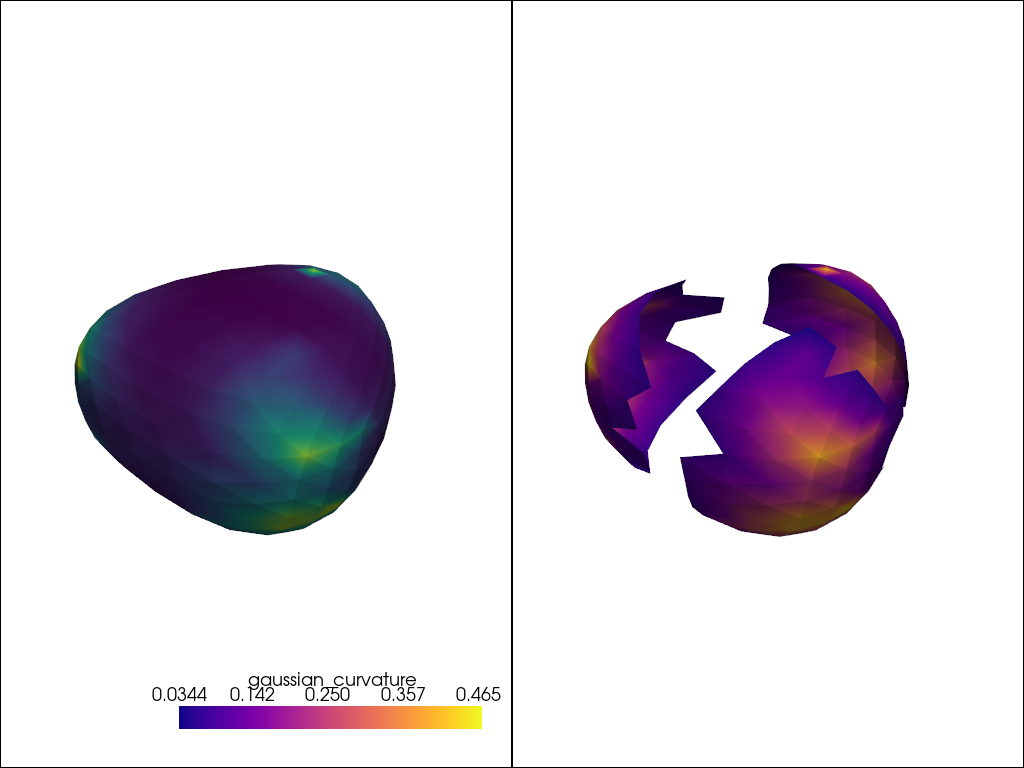

In [ ]:
import pyvista as pv
import numpy as np

# 1. Load mesh
mesh = pv.read(r"D:\New folder\dataset- check\smallestModels\37322.stl")
print("Original Mesh Info:")
print(f"Vertices: {mesh.n_points}, Faces: {mesh.n_cells}")

# 2. Refine mesh to capture small-scale features
refined_mesh = mesh.subdivide(nsub=2, subfilter='loop')  # increase nsub if needed
print("\nRefined Mesh Info:")
print(f"Vertices: {refined_mesh.n_points}, Faces: {refined_mesh.n_cells}")

# Optional: gentle smoothing (preserve small details)
smoothed_mesh = refined_mesh.smooth(n_iter=20, relaxation_factor=0.05)


# 3. Compute Gaussian curvature
gaussian_curvature = smoothed_mesh.curvature(curv_type='gaussian')
smoothed_mesh['gaussian_curvature'] = gaussian_curvature

# 4. Apply constraint: select only high-curvature regions
threshold = 0.1  # adjust depending on your model
high_curv_mask = gaussian_curvature > threshold

# Create a new mesh containing only high-curvature points
high_curv_mesh = smoothed_mesh.extract_points(high_curv_mask)

print(f"\nHigh-Curvature Region Info:")
print(f"Vertices: {high_curv_mesh.n_points}, Faces: {high_curv_mesh.n_cells}")
print(f"Average curvature in constrained region: {gaussian_curvature[high_curv_mask].mean():.4f}")


# 5. Visualization
plotter = pv.Plotter(shape=(1,2))

# Full refined mesh with curvature
plotter.add_mesh(smoothed_mesh, scalars='gaussian_curvature', cmap='viridis', show_scalar_bar=True)
plotter.subplot(0,1)
# Only high-curvature constrained region
plotter.add_mesh(high_curv_mesh, scalars='gaussian_curvature', cmap='plasma', show_scalar_bar=True)
plotter.show()
